In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import datetime

In [2]:
# Define bond-like instruments with synthetic data
bond_data = {
    'Ticker': ['BOND1', 'BOND2', 'BOND3'],
    'Maturity': ['2022-06-30', '2023-12-31', '2025-03-15'],
    'FaceValue': [1000, 500, 750],
    'YieldToMaturity': [0.035, 0.045, 0.04],
    'Price': [950, 480, 700],
}

In [3]:
# Define the date range for analysis
start_date = datetime.datetime(2021, 1, 1)
end_date = datetime.datetime(2025, 12, 31)

# Create a DataFrame with bond data
bonds_df = pd.DataFrame(bond_data)
bonds_df['Maturity'] = pd.to_datetime(bonds_df['Maturity'])

# Initialize a portfolio DataFrame
portfolio = pd.DataFrame(index=pd.date_range(start=start_date, end=end_date))


In [4]:
# Calculate bond quantities based on initial allocation (equal weights)
initial_allocation = 1 / len(bonds_df)
for i, bond in bonds_df.iterrows():
    ticker = bond['Ticker']
    price = bond['Price']
    portfolio[ticker] = initial_allocation * (bonds_df['FaceValue'][i] / price)

# Simulate bond price changes (example: price increases by 1% annually)
for date in portfolio.index:
    for i, bond in bonds_df.iterrows():
        ticker = bond['Ticker']
        price = portfolio.at[date, ticker]
        price *= 1.01  # Assume a 1% annual price increase
        portfolio.at[date, ticker] = price

In [5]:
# Calculate the total portfolio value
portfolio['TotalValue'] = portfolio.sum(axis=1)

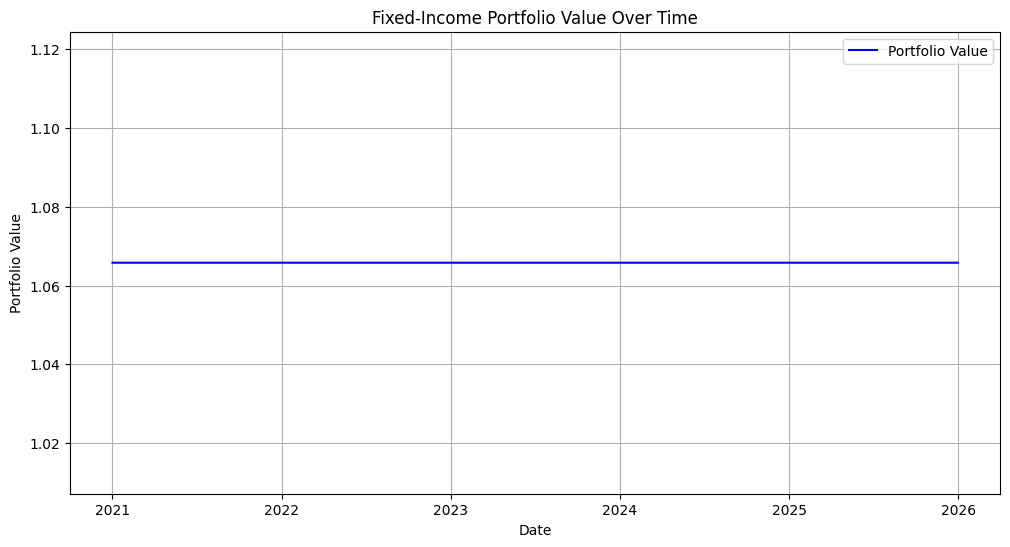

In [6]:
# Visualize the portfolio value over time
plt.figure(figsize=(12, 6))
plt.plot(portfolio['TotalValue'], label='Portfolio Value', color='blue')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.title('Fixed-Income Portfolio Value Over Time')
plt.legend()
plt.grid(True)
plt.show()